In [33]:
import numpy as np
import pandas as pd
import pgmpy
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
dag = DiscreteBayesianNetwork([("T", "E"), ("E", "X"), ("A", "T"), ("L", "E"), ("S","L"), ("S", "B"), ('B', "D"), ("E", "D")])

In [19]:
cpd_S = TabularCPD(variable="S", variable_card=2,
                   values=[[0.6],    # P(S=0)
                           [0.4]])   # P(S=1)

cpd_A = TabularCPD(variable="A", variable_card=2,
                   values=[[0.8],
                           [0.2]])

cpd_T = TabularCPD(variable="T", variable_card=2,
                   values=[[0.7],    # P(T=0)
                           [0.3]])   # P(T=1)

In [20]:
cpd_L = TabularCPD(variable="L", variable_card=2,
                   values=[[0.9, 0.2],   # P(L=0 | S=0), P(L=0 | S=1)
                           [0.1, 0.8]],  # P(L=1 | S=0), P(L=1 | S=1)
                   evidence=["S"],
                   evidence_card=[2])

In [21]:
cpd_B = TabularCPD(variable="B", variable_card=2,
                   values=[[0.7, 0.3],
                           [0.3, 0.7]],
                   evidence=["S"],
                   evidence_card=[2])

In [22]:
cpd_X = TabularCPD(variable="X", variable_card=2,
                   values=[[0.95, 0.4],
                           [0.05, 0.6]],
                   evidence=["E"],
                   evidence_card=[2])

In [23]:
cpd_E = TabularCPD(variable="E", variable_card=2,
                   values=[
                       [0.99, 0.85, 0.6, 0.2],   # P(E=0 | T,L)
                       [0.01, 0.15, 0.4, 0.8],   # P(E=1 | T,L)
                   ],
                   evidence=["T", "L"],
                   evidence_card=[2, 2])

In [24]:
cpd_D = TabularCPD(variable="D", variable_card=2,
                   values=[
                       [0.95, 0.6, 0.4, 0.1],   # P(D=0 | B,E)
                       [0.05, 0.4, 0.6, 0.9],   # P(D=1 | B,E)
                   ],
                   evidence=["B", "E"],
                   evidence_card=[2, 2])

In [27]:
dag.add_cpds(cpd_S, cpd_A, cpd_T, cpd_L, cpd_B, cpd_E, cpd_X, cpd_D)

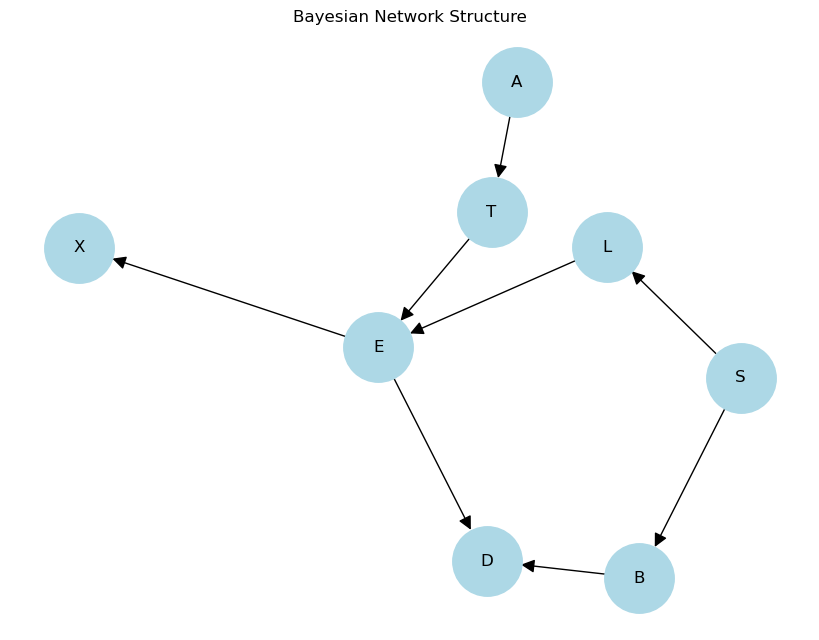

In [ ]:
edges = [("T", "E"), 
         ("E", "X"), 
         ("A", "T"), 
         ("L", "E"), 
         ("S", "L"), 
         ("S", "B"), 
         ("B", "D"), 
         ("E", "D")]

# Build a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Layout (spring is usually nice)
pos = nx.spring_layout(G, seed=42)

# Plot
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=2500,
    node_color="lightblue",
    font_size=12,
    arrowsize=20,
    arrowstyle="-|>"
)

plt.title("Bayesian Network Structure")
plt.show()


In [44]:
test = dag.is_dconnected("T", "S", {"D"})
print(not test)

False


In [45]:
print(not dag.is_dconnected("L", "B", {"S"}))

True
